# ConvNN Attention Testing


## I. 1D Training for testing with MNIST1D Dataset

In [ ]:
# Torch
import torch 
import torch.nn as nn
import torch.nn.functional as F
from torch import optim 
from torchsummary import summary
from torchvision.transforms import v2
import numpy as np


# Train + Data 
import sys 
sys.path.append('../Layers')
from Conv1d_NN import Conv1d_NN_optimized_v2, Conv1d_NN
from Conv1d_NN_Attn import Conv1d_NN_Attn

sys.path.append('../Data')
from CBSD68 import NoisyCBSD68_dataset, test_denoise_visual_CBSD
from MNIST1D import MNIST1D_Dataset, MNIST1D_Plot


sys.path.append('../Train')
from train1d import *

import numpy as np


### MNIST Data

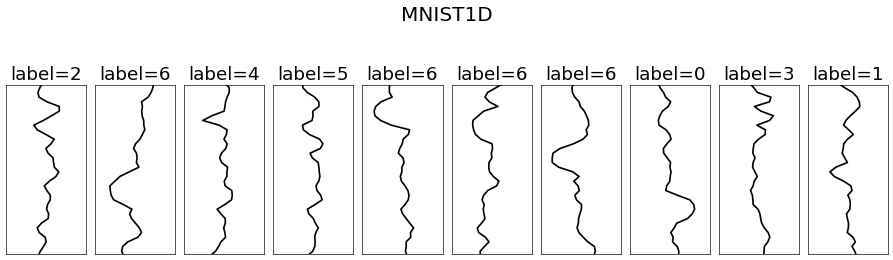

torch.Size([4000, 1, 40]) (4000,)


In [2]:
# Regular Noise Dataset
dataset = MNIST1D_Dataset() 
data = dataset.make_dataset()
Plot = MNIST1D_Plot()
Plot.plot_signals(data['x'][:10], data['t'],labels = data['y'][:10], zoom = 5, title='MNIST1D') 

print(data['x'].shape, data['y'].shape)

### Models

In [3]:
CNN = nn.Sequential(
    nn.Conv1d(1, 32, kernel_size=5, stride=1, padding=2),
    nn.ReLU(),
    nn.Conv1d(32, 64, kernel_size=5, stride=1, padding=2),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(2560, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

summary(CNN, (1, 40), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 32, 40]             192
              ReLU-2               [-1, 32, 40]               0
            Conv1d-3               [-1, 64, 40]          10,304
              ReLU-4               [-1, 64, 40]               0
           Flatten-5                 [-1, 2560]               0
            Linear-6                  [-1, 128]         327,808
              ReLU-7                  [-1, 128]               0
            Linear-8                   [-1, 10]           1,290
Total params: 339,594
Trainable params: 339,594
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.08
Params size (MB): 1.30
Estimated Total Size (MB): 1.38
----------------------------------------------------------------


In [4]:
ConvNN_1d = nn.Sequential(
    Conv1d_NN(1, 32, K = 5, stride = 5),
    nn.ReLU(),
    Conv1d_NN(32, 64, K = 5, stride = 5),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(2560, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

summary(ConvNN_1d, (1, 40), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv1d-1               [-1, 32, 40]             192
         Conv1d_NN-2               [-1, 32, 40]               0
              ReLU-3               [-1, 32, 40]               0
            Conv1d-4               [-1, 64, 40]          10,304
         Conv1d_NN-5               [-1, 64, 40]               0
              ReLU-6               [-1, 64, 40]               0
           Flatten-7                 [-1, 2560]               0
            Linear-8                  [-1, 128]         327,808
              ReLU-9                  [-1, 128]               0
           Linear-10                   [-1, 10]           1,290
Total params: 339,594
Trainable params: 339,594
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.11
Params size (MB): 1.30
Estimated T

In [5]:
ConvNN_1d_Attn = nn.Sequential(
    Conv1d_NN_Attn(1, 32, K = 5, stride = 5, num_tokens=40),
    nn.ReLU(),
    Conv1d_NN_Attn(32, 64, K = 5, stride = 5, num_tokens=40),
    nn.ReLU(),
    nn.Flatten(),
    nn.Linear(2560, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

summary(ConvNN_1d_Attn, (1, 40), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                [-1, 1, 40]           1,600
            Linear-2                [-1, 1, 40]           1,600
            Linear-3                [-1, 1, 40]           1,600
            Conv1d-4               [-1, 32, 40]             192
    Conv1d_NN_Attn-5               [-1, 32, 40]               0
              ReLU-6               [-1, 32, 40]               0
            Linear-7               [-1, 32, 40]           1,600
            Linear-8               [-1, 32, 40]           1,600
            Linear-9               [-1, 32, 40]           1,600
           Conv1d-10               [-1, 64, 40]          10,304
   Conv1d_NN_Attn-11               [-1, 64, 40]               0
             ReLU-12               [-1, 64, 40]               0
          Flatten-13                 [-1, 2560]               0
           Linear-14                  [

### Testing

In [6]:
print("CNN")
results1 = train_model(data, CNN, dataset.model_args)

CNN
step 1000, dt 3.91s, train_loss 4.956e-03, test_loss 2.546e-01, train_acc 99.7, test_acc 94.2
step 2000, dt 3.33s, train_loss 6.464e-05, test_loss 2.447e-01, train_acc 100.0, test_acc 95.9
step 3000, dt 3.38s, train_loss 2.408e-05, test_loss 2.529e-01, train_acc 100.0, test_acc 96.0
step 4000, dt 3.20s, train_loss 1.092e-05, test_loss 2.602e-01, train_acc 100.0, test_acc 96.3
step 5000, dt 3.25s, train_loss 5.852e-06, test_loss 2.677e-01, train_acc 100.0, test_acc 96.3
step 6000, dt 3.29s, train_loss 3.340e-06, test_loss 2.758e-01, train_acc 100.0, test_acc 96.2


In [7]:
print("ConvNN_1d")
results2 = train_model(data, ConvNN_1d, dataset.model_args) 

ConvNN_1d
step 1000, dt 12.53s, train_loss 1.721e+00, test_loss 2.185e+00, train_acc 34.7, test_acc 21.9
step 2000, dt 11.94s, train_loss 1.525e+00, test_loss 2.404e+00, train_acc 39.0, test_acc 22.4
step 3000, dt 11.97s, train_loss 1.426e+00, test_loss 2.721e+00, train_acc 43.3, test_acc 21.5
step 4000, dt 12.60s, train_loss 1.396e+00, test_loss 3.054e+00, train_acc 43.6, test_acc 21.2
step 5000, dt 12.16s, train_loss 1.393e+00, test_loss 3.500e+00, train_acc 43.8, test_acc 22.1
step 6000, dt 12.50s, train_loss 1.254e+00, test_loss 3.893e+00, train_acc 47.0, test_acc 22.2


In [8]:
print("ConvNN_1d_Attn")
results3 = train_model(data, ConvNN_1d_Attn, dataset.model_args)


ConvNN_1d_Attn
step 1000, dt 9.30s, train_loss 8.761e-01, test_loss 2.455e+00, train_acc 66.0, test_acc 36.6
step 2000, dt 9.70s, train_loss 5.179e-01, test_loss 3.835e+00, train_acc 86.2, test_acc 37.1
step 3000, dt 9.21s, train_loss 1.991e-01, test_loss 5.504e+00, train_acc 89.8, test_acc 33.9
step 4000, dt 8.96s, train_loss 6.229e-01, test_loss 5.886e+00, train_acc 89.4, test_acc 37.6
step 5000, dt 8.98s, train_loss 3.570e-01, test_loss 5.017e+00, train_acc 91.1, test_acc 33.4
step 6000, dt 8.91s, train_loss 2.137e-01, test_loss 6.100e+00, train_acc 90.9, test_acc 29.7
